In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv")

In [7]:
print(df.head())

#show first 5 row

         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB
None


In [9]:
#check for missing values

print("\nmissing values in each column: ")
print(df.isnull().sum())



missing values in each column: 
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [10]:
#view unique countries

print("\nTotal unique countries:", df['Country'].nunique())
print("Some example countries:", df['Country'].unique()[:10])


Total unique countries: 198
Some example countries: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia']


In [11]:
df['DeathRate'] = df['Deaths'] / df['Confirmed'].replace(0,1)
print("\nData with DeathRate:")
print(df[['Country','Date','Confirmed','Deaths','DeathRate']].head())


Data with DeathRate:
       Country        Date  Confirmed  Deaths  DeathRate
0  Afghanistan  2020-01-22          0       0        0.0
1  Afghanistan  2020-01-23          0       0        0.0
2  Afghanistan  2020-01-24          0       0        0.0
3  Afghanistan  2020-01-25          0       0        0.0
4  Afghanistan  2020-01-26          0       0        0.0


In [12]:
#Group data by country and sum up the values

total_by_Country = df.groupby('Country')[['Confirmed','Deaths','Recovered']].sum()

#sort by confirmed cases in descending order
sorted_total = total_by_Country.sort_values(by='Confirmed',ascending=False)

print("\nTop 10 countries by confirmed cases:")
print(sorted_total.head(10))


Top 10 countries by confirmed cases:
                  Confirmed     Deaths   Recovered
Country                                           
US              22963151317  368024697   496971828
India           14681429726  192264062  4859387857
Brazil           9991736059  264795351  3412350387
France           4588778075   62237882    96506536
United Kingdom   4376490715   75343186     3447801
Russia           4055403879   97041399  1128064202
Turkey           3505368946   29977822   919259007
Germany          3007332317   46750203   695248246
Italy            2914673720   70245227   759237934
Spain            2754459962   47685434    71183831


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_9392\186176540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10['Confirmed'], palette='rocket')


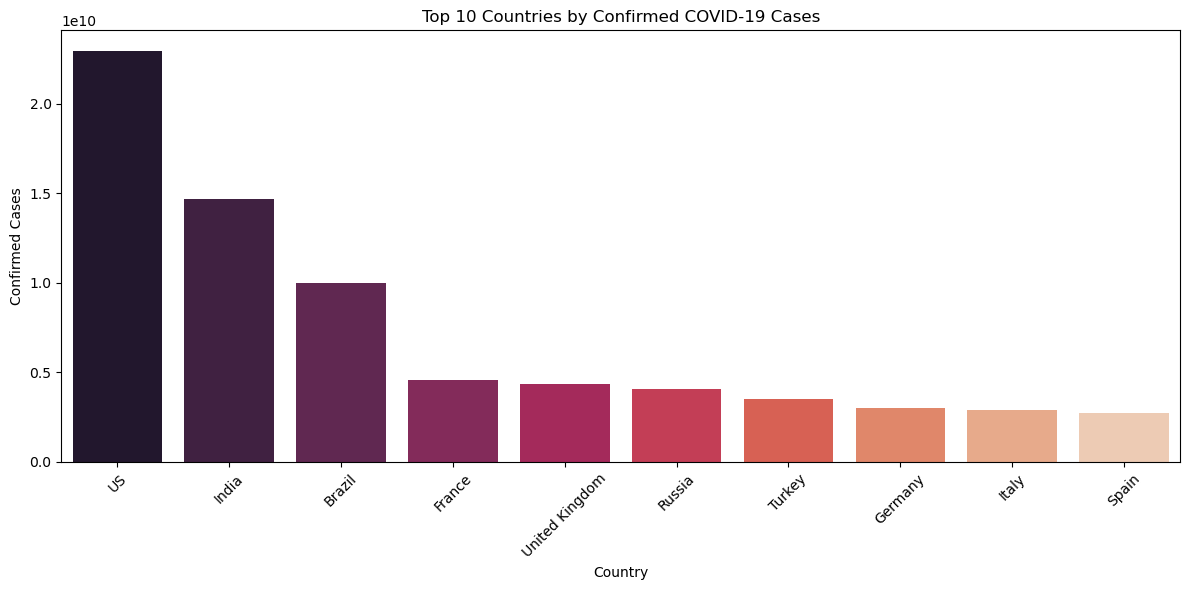

In [14]:
# Take top 10 countries
top_10 = sorted_total.head(10)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_10.index, y=top_10['Confirmed'], palette='rocket')
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.ylabel("Confirmed Cases")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
india_data =df[df['Country'] == 'India']

In [16]:
india_daily = india_data.groupby('Date').sum().reset_index()

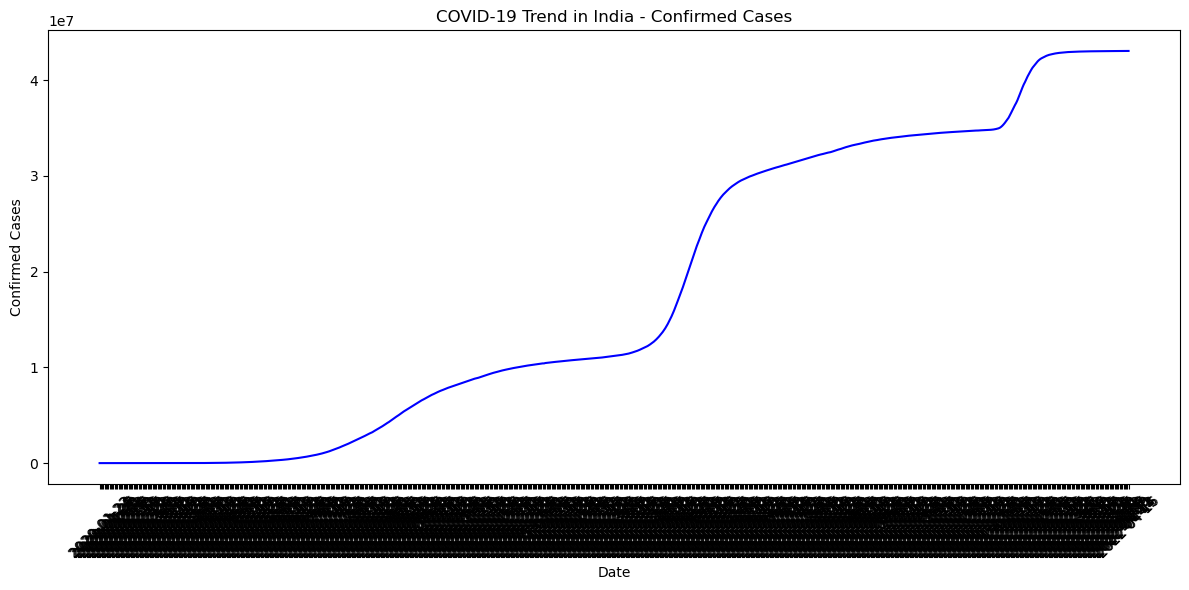

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=india_daily, x='Date', y='Confirmed', color='blue')
plt.title("COVID-19 Trend in India - Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
india_data = df[df['Country'] == 'India']

In [21]:
india_daily = india_data.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

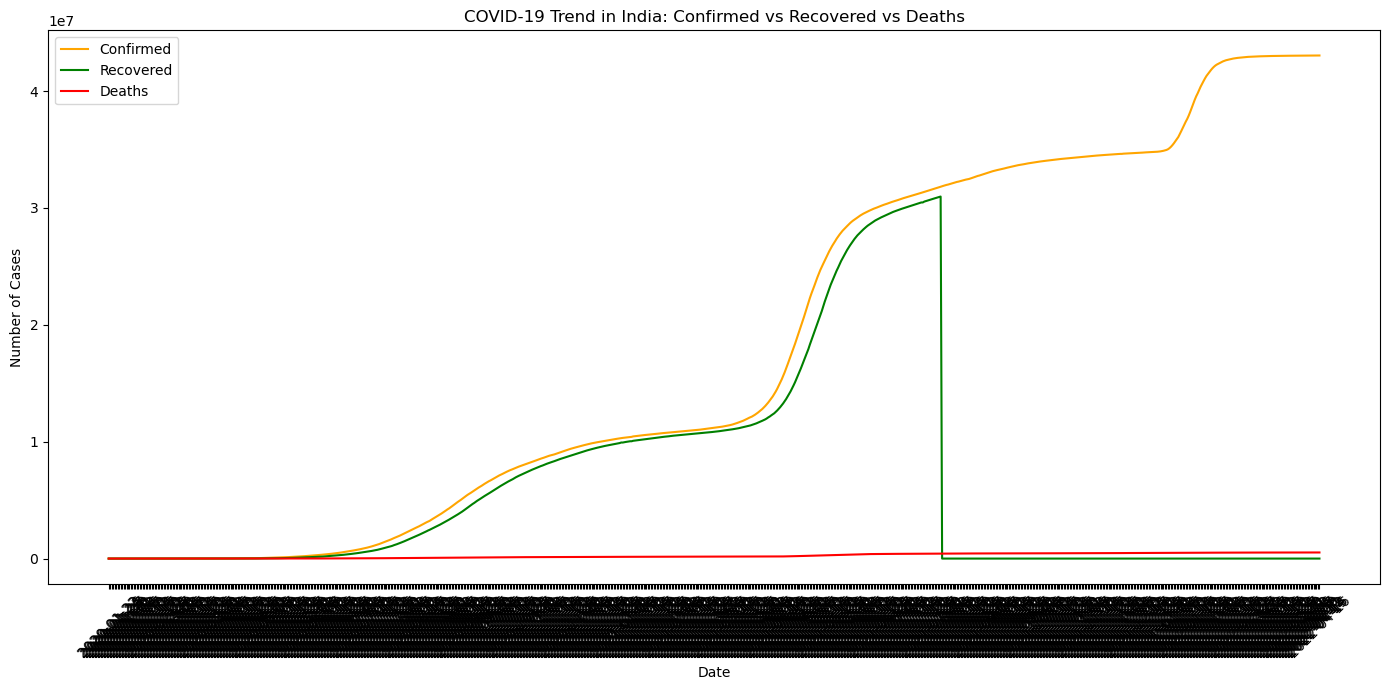

In [22]:
plt.figure(figsize=(14,7))
sns.lineplot(data=india_daily, x='Date', y='Confirmed', label='Confirmed', color='orange')
sns.lineplot(data=india_daily, x='Date', y='Recovered', label='Recovered', color='green')
sns.lineplot(data=india_daily, x='Date', y='Deaths', label='Deaths', color='red')
plt.title("COVID-19 Trend in India: Confirmed vs Recovered vs Deaths")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
latest = india_daily.iloc[-1]  # Get the latest date's data

In [27]:
labels = ['Confirmed', 'Recovered', 'Deaths']
values = [latest['Confirmed'], latest['Recovered'], latest['Deaths']]
colors = ['orange', 'green', 'red']


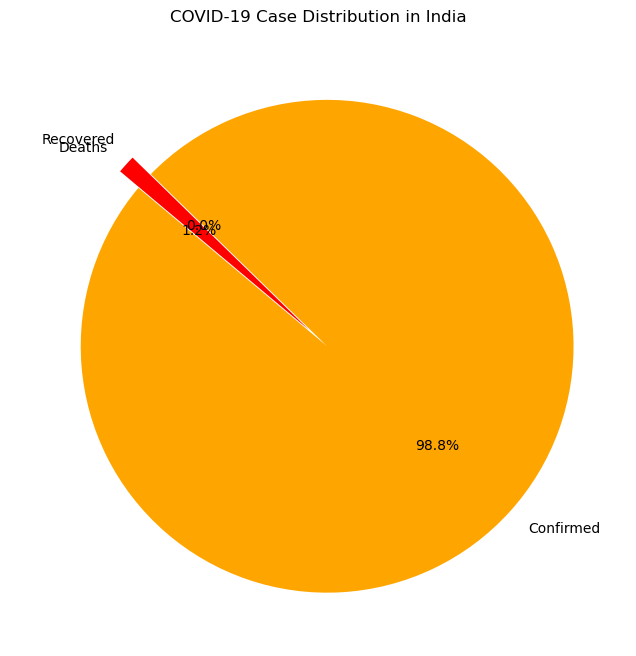

In [26]:
plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=(0.05,0.05,0.05))
plt.title("COVID-19 Case Distribution in India")
plt.show()


In [34]:
summary = {
    'Metric': ['Confirmed', 'Recovered', 'Deaths'],
    'Total': [latest['Confirmed'], latest['Recovered'], latest['Deaths']]
}


In [35]:
summary_df = pd.DataFrame(summary)

In [36]:
summary_df.to_csv('india_covid_summary.csv', index=False)  